In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os, sys

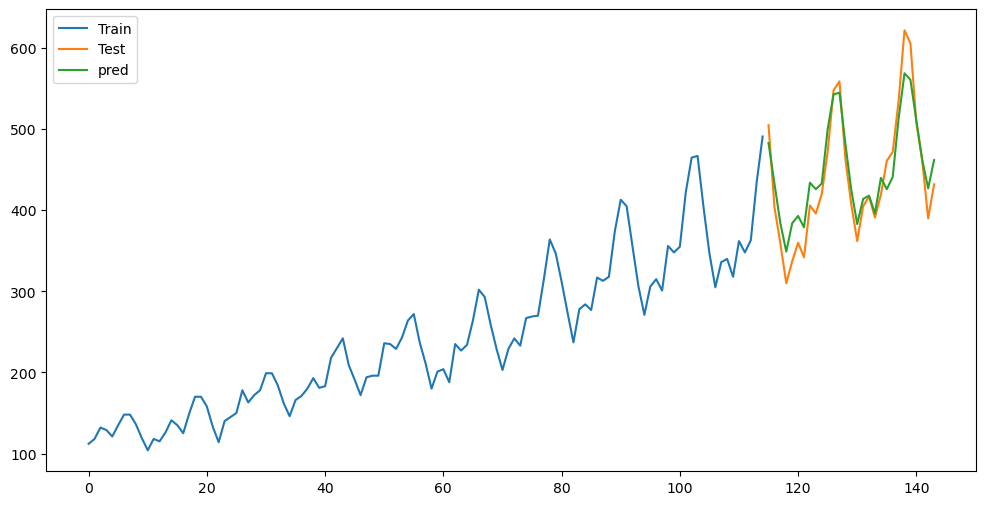

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from pmdarima.datasets import load_airpassengers

# 加载示例数据（航空乘客数据集）
# 这是一个经典的时间序列数据集，展示了1949-1960年每月航空乘客数量的增长趋势
data = load_airpassengers(as_series=True)

# 划分训练集和测试集
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# 使用auto_arima自动寻找最佳ARIMA参数
# 它会自动尝试不同的(p,d,q)组合，并选择AIC值最小的模型
model = auto_arima(train.values, 
                   seasonal=True,  # 启用季节性组件
                   trace=False,     # 显示训练过程
                   m=24,
                   error_action='ignore',
                   suppress_warnings=True)

# 进行预测
forecast_steps = len(test)
forecast, conf_int = model.predict(n_periods=forecast_steps, return_conf_int=True)

# 将预测结果转换为Series，方便绘图
forecast_series = pd.Series(forecast, index=test.index)

# 绘制预测结果
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast_series, label='pred')
plt.legend()

In [41]:
TASK1_SUBMIT_DF = pd.read_csv("子赛题1：机组数据驱动的风电场短期风况预测/filtered_初赛_提交模板.csv")
preds_风速 = []
preds_风向 = []

for (风场, 风机), df in TASK1_SUBMIT_DF.groupby(["风场", "风机"]):
    paths = glob.glob("子赛题1：机组数据驱动的风电场短期风况预测/训练集/" + keys[0] + "/" + keys[1] + "/*")
    paths.sort()

    dfs = []
    for path in paths[-7:]:
        df = pd.read_csv(path)
        df = df.dropna()
        if len(df) == 0:
            continue
        
        dfs.append(df)
    dfs = pd.concat(dfs)
    
    model = auto_arima(
        dfs["风速"].values, 
        seasonal=False,  # 先关闭季节性
        start_p=0, start_q=0,
        max_p=2, max_q=2,  # 大幅限制参数范围
        d=None,           # 让自动选择差分阶数
       m=60, n_jobs=-1, maxiter=5,
       error_action='ignore',
       suppress_warnings=True)
    pred = model.predict(len(TASK1_SUBMIT_DF.loc[(TASK1_SUBMIT_DF["风场"] == 风场) & (TASK1_SUBMIT_DF["风机"] == 风机)]))
    preds_风速 += list(pred)

    model = auto_arima(
        dfs["风向"].values, 
        seasonal=False,  # 先关闭季节性
        start_p=0, start_q=0,
        max_p=2, max_q=2,  # 大幅限制参数范围
        d=None,           # 让自动选择差分阶数
       m=60, n_jobs=-1, maxiter=5,
       error_action='ignore',
       suppress_warnings=True)
    pred = model.predict(len(TASK1_SUBMIT_DF.loc[(TASK1_SUBMIT_DF["风场"] == 风场) & (TASK1_SUBMIT_DF["风机"] == 风机)]))
    preds_风向 += list(pred)

    print(风场, 风机)

ERROR! Session/line number was not unique in database. History logging moved to new session 198
风场1 m01
风场1 m02
风场1 m03
风场1 m04
风场1 m05
风场1 m06
风场1 m07
风场1 m08
风场1 m09
风场1 m10
风场1 m11
风场1 m12
风场1 m13
风场1 m14
风场1 m15
风场1 m16
风场1 m17
风场1 m18
风场1 m19
风场1 m20
风场1 m21
风场1 m22
风场1 m23
风场1 m24
风场1 m25
风场2 m26
风场2 m27
风场2 m28
风场2 m29
风场2 m30
风场2 m31
风场2 m32
风场2 m33
风场2 m34
风场2 m35
风场2 m36
风场2 m37
风场2 m38
风场2 m39
风场2 m40
风场2 m41
风场2 m42
风场2 m43
风场2 m44
风场2 m45
风场2 m46
风场2 m47
风场2 m48
风场2 m49
风场2 m50


In [42]:
TASK1_SUBMIT_DF['风速'] = preds_风速
TASK1_SUBMIT_DF['风向'] = preds_风向

TASK1_SUBMIT_DF.to_csv("task1_sub.csv", index=None)

In [20]:
columns = ['SeqNum']
for i in range(1, 57):
    columns.append(f'Prediction{i}')

data = []
for i in range(1, 4):
    row = [i] + [0] * 56
    data.append(row)

TASK2_SUBMIT_DF = pd.DataFrame(data, columns=columns)



job1 = pd.read_excel("子赛题2：水电站入库流量预测/测试集_初赛/预测01/入库流量数据.xlsx")
model = auto_arima(job1["Qi"].values, 
                   seasonal=True,
                   trace=False,
                   m=24, n_jobs=-1, maxiter=5,
                   error_action='ignore',
                   suppress_warnings=True)
forecast, conf_int = model.predict(n_periods=56, return_conf_int=True)
TASK2_SUBMIT_DF.loc[0] = [1] + list(forecast)


job2 = pd.read_excel("子赛题2：水电站入库流量预测/测试集_初赛/预测02/入库流量数据.xlsx")
model = auto_arima(job2["Qi"].values, 
                   seasonal=True,
                   trace=False,
                   m=24, n_jobs=-1, maxiter=5,
                   error_action='ignore',
                   suppress_warnings=True)
forecast, conf_int = model.predict(n_periods=56, return_conf_int=True)
TASK2_SUBMIT_DF.loc[1] = [2] + list(forecast)

job3 = pd.read_excel("子赛题2：水电站入库流量预测/测试集_初赛/预测03/水库流量数据.xlsx")
model = auto_arima(job3["Qi"].values, 
                   seasonal=True,
                   trace=False,
                   m=24, n_jobs=-1, maxiter=5,
                   error_action='ignore',
                   suppress_warnings=True)
forecast, conf_int = model.predict(n_periods=56, return_conf_int=True)
TASK2_SUBMIT_DF.loc[2] = [3] + list(forecast)

TASK2_SUBMIT_DF.to_csv("task2_sub.csv", index=None)

In [3]:
task_kucun = pd.read_csv("./子赛题3：离散制造行业产品物料需求智能预测/训练集/历史库存量.csv")
task_xuqiu = pd.read_csv("./子赛题3：离散制造行业产品物料需求智能预测/训练集/历史需求量.csv")
task_xuqiu["物料编码"] = task_xuqiu["物料编码"].astype(int)
task_xuqiu["过账日期"] = pd.to_datetime(task_xuqiu["过账日期"])
task_xuqiu["month"] = task_xuqiu["过账日期"].dt.strftime('%Y%m')

sub = task_xuqiu.groupby(["工厂编码", "物料编码"])["需求量"].mean().reset_index()
sub.columns = ["工厂编码", "物料编码", "M+1月预测需求量"]
sub["M+2月预测需求量"] = sub["M+1月预测需求量"]
sub.to_csv("task3_sub.csv", index=None)

In [4]:
sub = []
for 工厂编码, df in task_xuqiu.groupby("工厂编码"):
    pivot_result = df.pivot_table(
        index="month",        # 行索引
        columns="物料编码",    # 列索引
        values="需求量",       # 要聚合的值
        aggfunc="sum",        # 聚合函数：求和
        fill_value=0          # 缺失值填充为0
    )
    for 物料编码 in pivot_result.columns:
        if (pivot_result[物料编码].values == 0).mean() > 0.5:
            pred = [0, 0]
        else:
            try:
                model = auto_arima(pivot_result[物料编码].values, 
                                   seasonal=True,
                                   trace=False,
                                   m=24, n_jobs=-1, maxiter=5,
                                   error_action='ignore',
                                   suppress_warnings=True)
                pred, conf_int = model.predict(n_periods=2, return_conf_int=True)
            except:
                pred = [pivot_result[物料编码].mean()] * 2

        print(工厂编码, 物料编码)
        
    sub.append([工厂编码, 物料编码] + pred)

1001 2017
1001 2019
1001 2039
1001 2050
1001 2053
1001 2054
1001 2064
1001 2074
1001 2087
1001 2097
1001 2117
1001 2121
1001 2123
1001 2129
1001 2149
1001 2151
1001 2155
1001 2159
1001 2160
1001 2164
1001 2174
1001 2191
1001 2227
1001 2230
1001 2233
1001 2248
1002 2006
1002 2014
1002 2017
1002 2019
1002 2020
1002 2033
1002 2039
1002 2047
1002 2048
1002 2053
1002 2054
1002 2064
1002 2070
1002 2071
1002 2074
1002 2077
1002 2087
1002 2095
1002 2097
1002 2113
1002 2115
1002 2117
1002 2121
1002 2129
1002 2141
1002 2144
1002 2149
1002 2155
1002 2159
1002 2160
1002 2164
1002 2168
1002 2187
1002 2188
1002 2190
1002 2191
1002 2198
1002 2200
1002 2207
1002 2227
1002 2230
1002 2233
1002 2242
1002 2248
1003 2007
1003 2015
1003 2017
1003 2026
1003 2033
1003 2039
1003 2045
1003 2050
1003 2053
1003 2054
1003 2057
1003 2059
1003 2070
1003 2071
1003 2074
1003 2075
1003 2079
1003 2097
1003 2115
1003 2117
1003 2121
1003 2123
1003 2126
1003 2129
1003 2144
1003 2148
1003 2149
1003 2151
1003 2155
1003 2156


In [7]:
sub = pd.DataFrame(sub)
sub.columns = ["工厂编码", "物料编码", "M+1月预测需求量", "M+2月预测需求量"]
sub.fillna(0).to_csv("task3_sub.csv", index=None)